In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the source dataset directory and the output directory
dataset_dir = './Indian_Spices_Dataset/'
output_dir = './indian_spices/'

# Create directories for train, validation, and test sets
os.makedirs(output_dir + 'Training', exist_ok=True)
os.makedirs(output_dir + 'Validation', exist_ok=True)
os.makedirs(output_dir + 'Test', exist_ok=True)

# Get the list of spice categories (folders)
spices = [spice for spice in os.listdir(dataset_dir) if not spice.startswith('.')]

for spice in spices:
    # Create train, val, and test folders for each spice
    os.makedirs(output_dir + 'Training/' + spice, exist_ok=True)
    os.makedirs(output_dir + 'Validation/' + spice, exist_ok=True)
    os.makedirs(output_dir + 'Test/' + spice, exist_ok=True)

    # Get all image filenames for each spice, ignoring hidden files
    images = [img for img in os.listdir(dataset_dir + spice) if not img.startswith('.')]

    # Split images into train, val, and test sets
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Move images to respective folders
    for img in train_images:
        shutil.move(dataset_dir + spice + '/' + img, output_dir + 'Training/' + spice + '/' + img)
    for img in val_images:
        shutil.move(dataset_dir + spice + '/' + img, output_dir + 'Validation/' + spice + '/' + img)
    for img in test_images:
        shutil.move(dataset_dir + spice + '/' + img, output_dir + 'Test/' + spice + '/' + img)

print("Dataset successfully split into train, validation, and test sets.")


Dataset successfully split into train, validation, and test sets.


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import os

In [4]:
dataset_path = './indian_spices'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset_path + '/Training',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    dataset_path + '/Validation',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

Found 6592 images belonging to 16 classes.
Found 1414 images belonging to 16 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Display the model summary
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         8,208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,655,568 (25.39 MB)

 Trainable params: 6,655,568 (25.39 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


206/206 ━━━━━━━━━━━━━━━━━━━━ 65s 304ms/step - accuracy: 0.2434 - loss: 2.3045 - val_accuracy: 0.4519 - val_loss: 2.3314
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 520s 3s/step - accuracy: 0.7124 - loss: 0.8023 - val_accuracy: 0.7963 - val_loss: 0.7361
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 71s 337ms/step - accuracy: 0.8537 - loss: 0.4245 - val_accuracy: 0.7893 - val_loss: 0.8628
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 68s 321ms/step - accuracy: 0.8936 - loss: 0.3084 - val_accuracy: 0.8649 - val_loss: 0.4938
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 66s 313ms/step - accuracy: 0.9168 - loss: 0.2420 - val_accuracy: 0.9279 - val_loss: 0.2427
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 65s 309ms/step - accuracy: 0.9299 - loss: 0.2040 - val_accuracy: 0.9250 - val_loss: 0.3030
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 67s 315ms/step - accuracy: 0.9444 - loss: 0.1699 - val_accuracy: 0.9385 - val_loss: 0.2484
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 66s 311ms/step - accuracy: 0.9495 - loss: 0.1602 - val_a

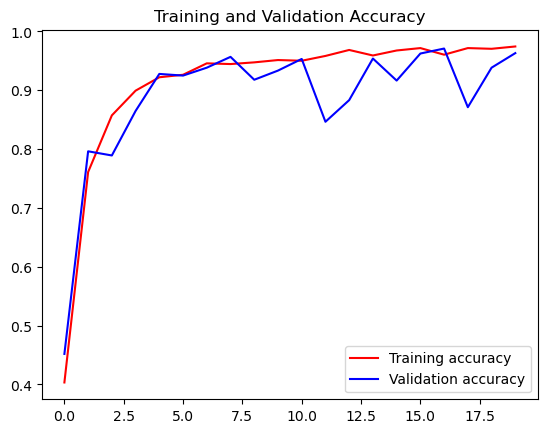

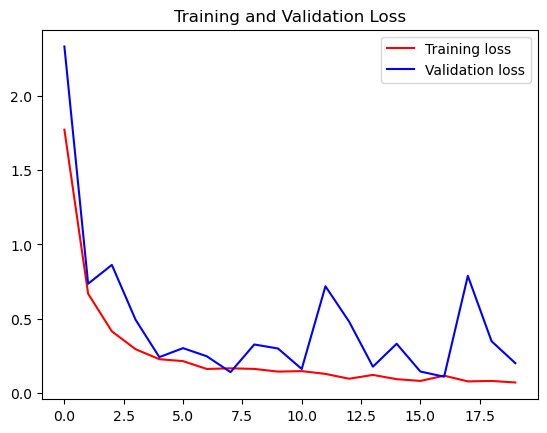

Found 1423 images belonging to 16 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.9590 - loss: 0.1799
Test Accuracy: 0.96


In [10]:
import matplotlib.pyplot as plt  # Add this import statement

# Plot accuracy and loss graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Test the model using the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'Test'),
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')


In [11]:
model.save('spices_classifier.h5')

In [12]:
# Save the model in the native Keras format
model.save('spices_classifier.keras')

In [13]:
pip install tensorflow pillow

Note: you may need to restart the kernel to use updated packages.


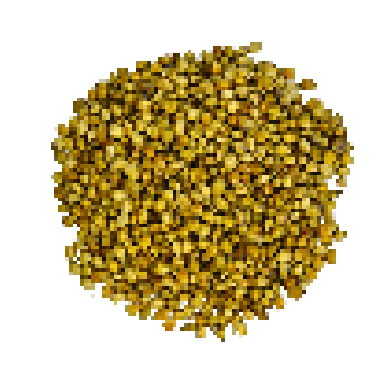

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Label: Coriander Seeds


In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Path to the image file
img_path = './spice_test6.jpg'  # Replace 'your_image.jpg' with your actual image filename

# Load and display the image
img = image.load_img(img_path, target_size=(100, 100))  # Ensure target_size matches your model input size (100x100)
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array = img_array / 255.0  # Scale the image to [0, 1] range

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Get the class labels
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

print(f'Predicted Label: {predicted_label}')